In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "lombardia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,3,Lombardia,79,25,104,127,231,65,68,...,3.0,2237.0,0.0,56.0,24.04,45.02,3.04,0.00,31.58,40.964
1,2020-02-26T18:00:00,3,Lombardia,79,25,104,145,249,18,18,...,0.0,-492.0,0.0,18.0,24.04,41.77,-3.66,0.00,0.00,7.792
2,2020-02-27T18:00:00,3,Lombardia,172,41,213,136,349,100,145,...,5.0,112.0,0.0,-9.0,19.25,61.03,129.46,0.00,64.00,58.233
3,2020-02-28T18:00:00,3,Lombardia,235,47,282,192,474,125,128,...,3.0,1515.0,0.0,56.0,16.67,59.49,8.45,0.00,14.63,36.676
4,2020-02-29T17:00:00,3,Lombardia,256,80,336,216,552,78,84,...,6.0,888.0,0.0,24.0,23.81,60.87,9.46,0.00,70.21,17.722
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264,2020-11-15T17:00:00,3,Lombardia,7781,837,8618,153923,162541,6262,8060,...,181.0,38702.0,16990.0,6082.0,9.71,5.30,20.83,47.44,2.45,5.157
265,2020-11-16T17:00:00,3,Lombardia,7901,855,8756,143583,152339,-10202,4128,...,99.0,18037.0,7285.0,-10340.0,9.76,5.75,22.89,56.66,2.15,2.540
266,2020-11-17T17:00:00,3,Lombardia,8151,894,9045,147522,156567,4228,8448,...,202.0,38283.0,17384.0,3939.0,9.88,5.78,22.07,48.60,4.56,5.546
267,2020-11-18T17:00:00,3,Lombardia,8323,903,9226,142857,152083,-4484,7633,...,182.0,38100.0,15780.0,-4665.0,9.79,6.07,20.03,48.37,1.01,4.875


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 7453
Nuovi tamponi: 37595.0
Percentuale nuovi positivi/nuovi tamponi: 19.8 %
Nuovi guariti: 3791.0
Nuovi deceduti: 165.0
Variazione positivi ricoverati con sintomi: -32.0
Variazione positivi in terapia intensiva: 12.0
Variazione positivi in isolamento dimiciliare: 3517.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 19, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-20T17:00:00,3,Lombardia,264,38,302,8705,9007,72,211,...,5.0,14926.0,9513.0,77.0,12.58,3.35,1.41,2.22,5.56,2.361
1,2020-09-21T17:00:00,3,Lombardia,283,36,319,8757,9076,69,90,...,1.0,9963.0,6695.0,52.0,11.29,3.51,0.90,1.34,-5.26,0.999
2,2020-09-22T17:00:00,3,Lombardia,294,34,328,8699,9027,-49,182,...,2.0,14808.0,11821.0,-58.0,10.37,3.63,1.23,1.54,-5.56,2.005
3,2020-09-23T17:00:00,3,Lombardia,308,33,341,8763,9104,77,196,...,0.0,22805.0,13961.0,64.0,9.68,3.75,0.86,1.40,-2.94,2.171
4,2020-09-24T17:00:00,3,Lombardia,303,31,334,8714,9048,-56,229,...,10.0,21369.0,13869.0,-49.0,9.28,3.69,1.07,1.65,-6.06,2.515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-15T17:00:00,3,Lombardia,7781,837,8618,153923,162541,6262,8060,...,181.0,38702.0,16990.0,6082.0,9.71,5.30,20.83,47.44,2.45,5.157
57,2020-11-16T17:00:00,3,Lombardia,7901,855,8756,143583,152339,-10202,4128,...,99.0,18037.0,7285.0,-10340.0,9.76,5.75,22.89,56.66,2.15,2.540
58,2020-11-17T17:00:00,3,Lombardia,8151,894,9045,147522,156567,4228,8448,...,202.0,38283.0,17384.0,3939.0,9.88,5.78,22.07,48.60,4.56,5.546
59,2020-11-18T17:00:00,3,Lombardia,8323,903,9226,142857,152083,-4484,7633,...,182.0,38100.0,15780.0,-4665.0,9.79,6.07,20.03,48.37,1.01,4.875


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

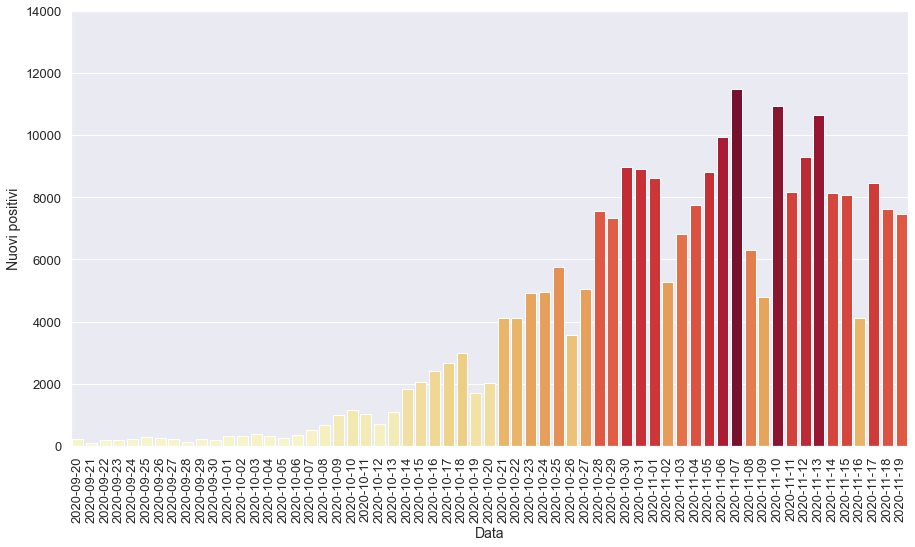

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

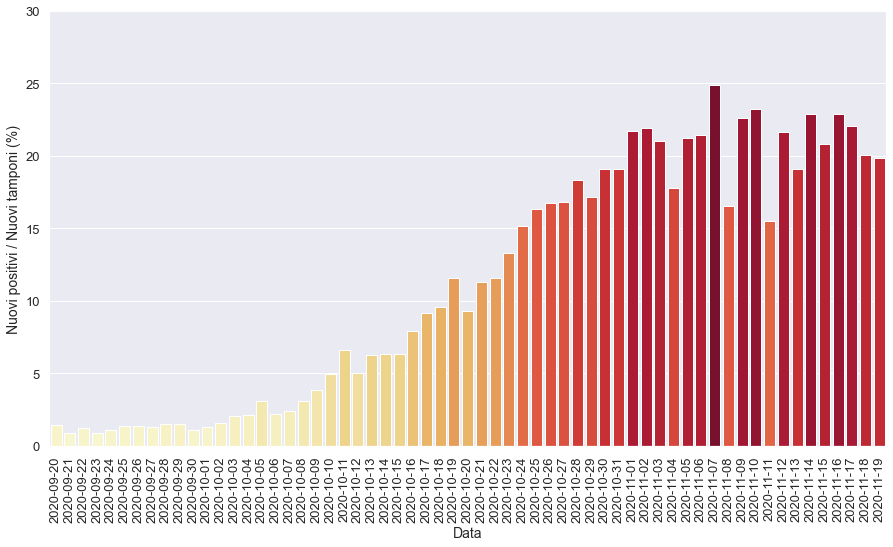

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

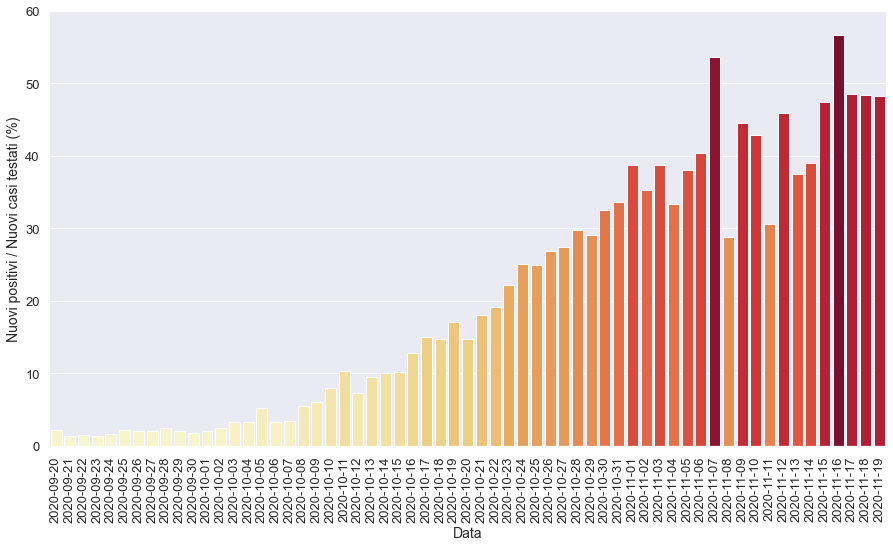

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

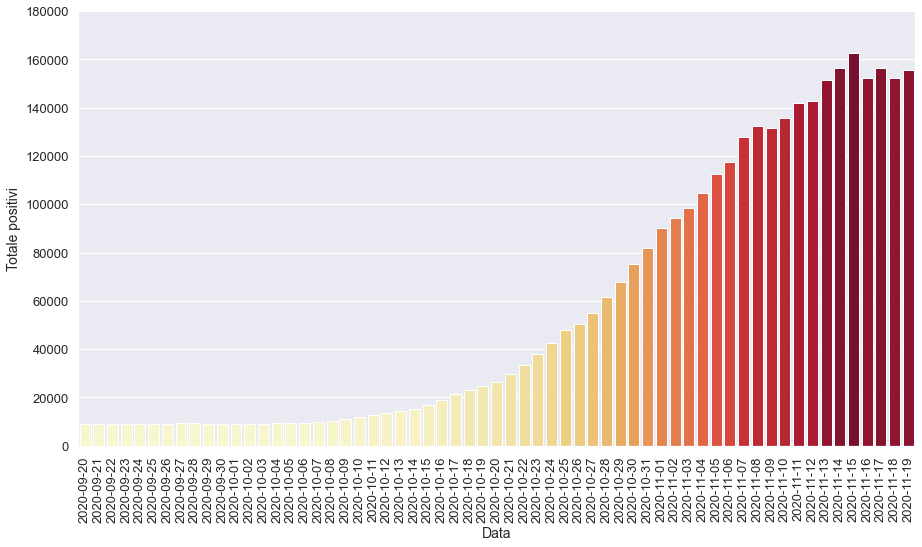

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

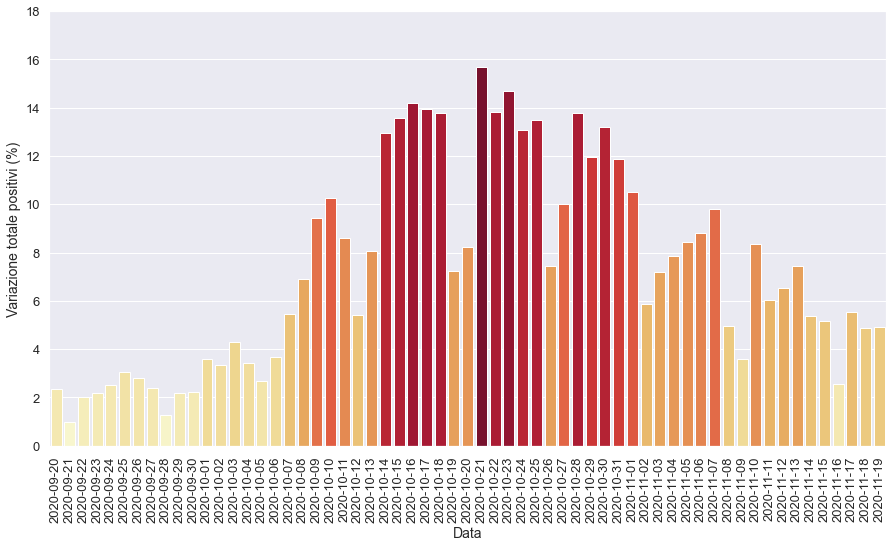

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

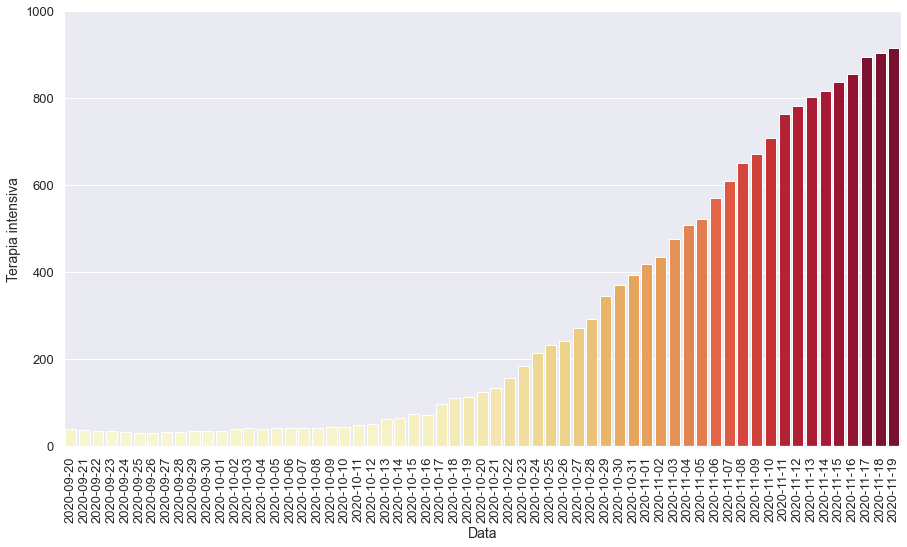

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

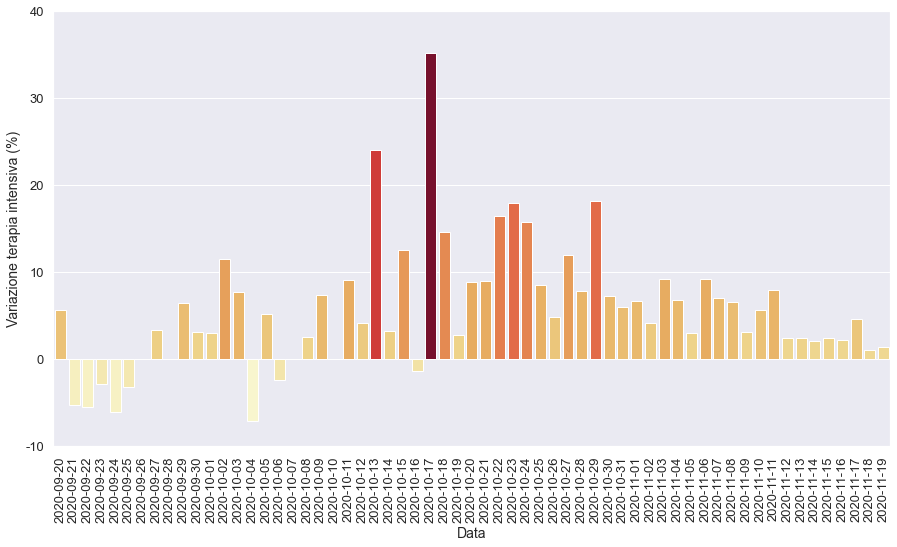

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

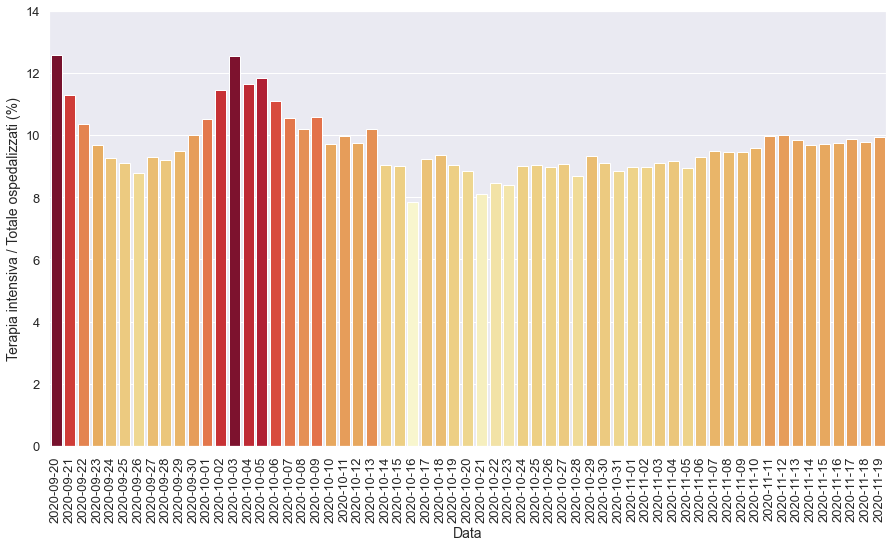

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

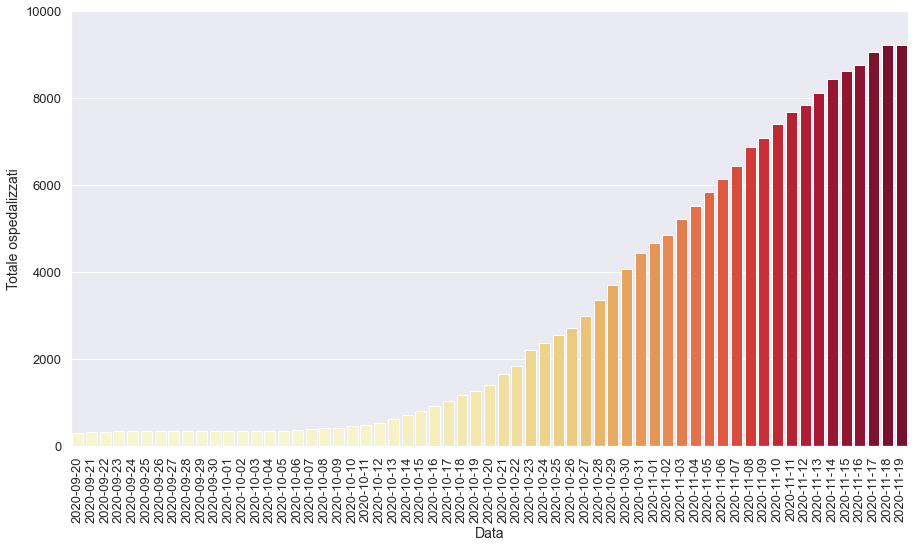

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

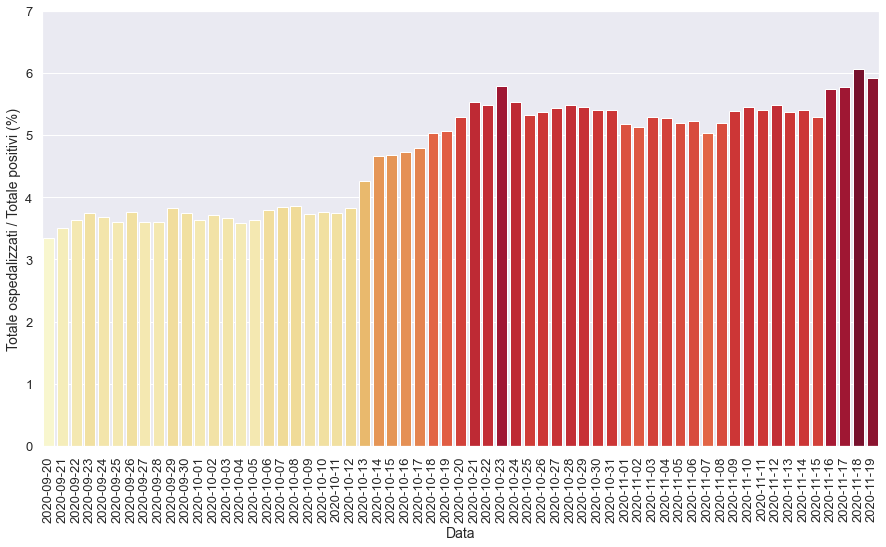

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

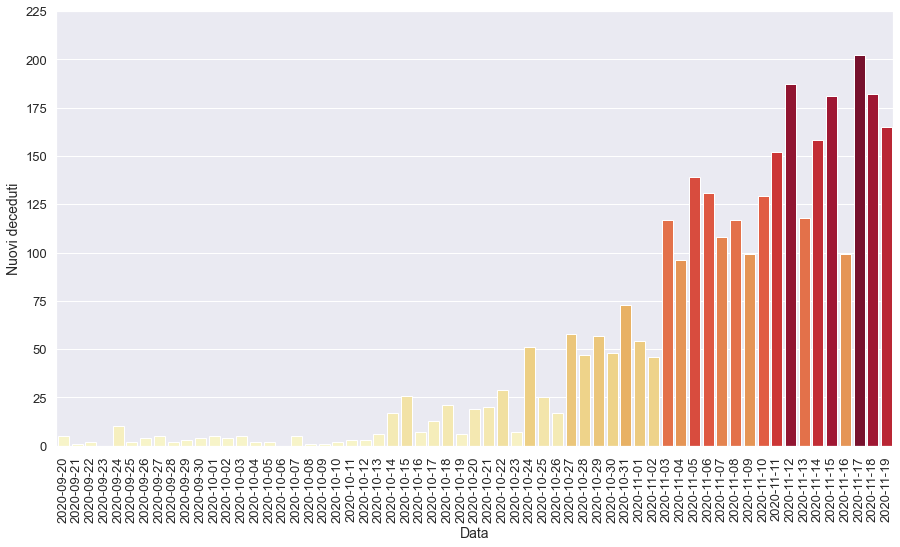

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

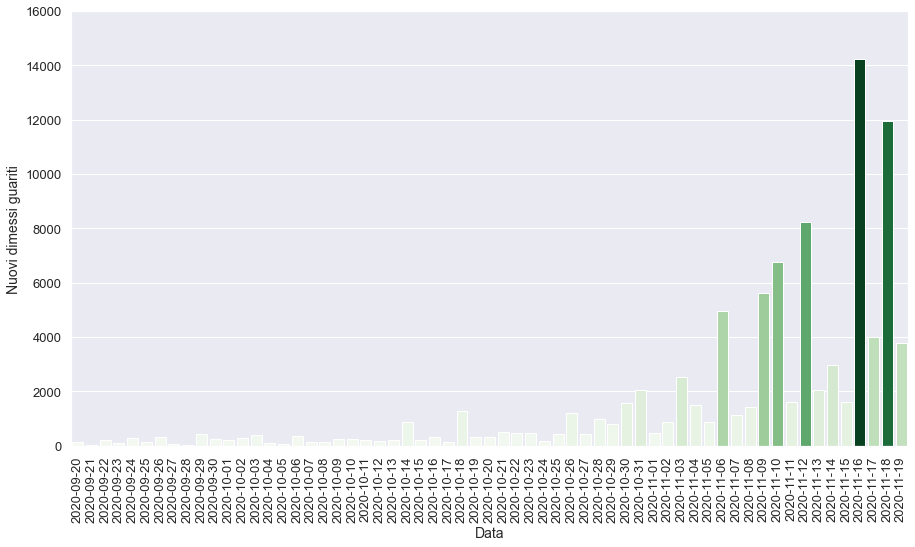

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-20T17:00:00,3,Lombardia,1268,123,1391,24913,26304,1670,2023,...,19.0,21726.0,13680.0,1528.0,8.84,5.29,9.31,14.79,8.85,8.212
1,2020-10-21T17:00:00,3,Lombardia,1521,134,1655,28235,29890,3586,4125,...,20.0,36416.0,22823.0,3322.0,8.10,5.54,11.33,18.07,8.94,15.682
2,2020-10-22T17:00:00,3,Lombardia,1685,156,1841,31677,33518,3628,4125,...,29.0,35715.0,21486.0,3442.0,8.47,5.49,11.55,19.20,16.42,13.801
3,2020-10-23T17:00:00,3,Lombardia,2013,184,2197,35753,37950,4432,4916,...,7.0,36963.0,22167.0,4076.0,8.38,5.79,13.30,22.18,17.95,14.667
4,2020-10-24T17:00:00,3,Lombardia,2153,213,2366,40319,42685,4735,4956,...,51.0,32749.0,19777.0,4566.0,9.00,5.54,15.13,25.06,15.76,13.059
5,2020-10-25T17:00:00,3,Lombardia,2326,231,2557,45426,47983,5298,5762,...,25.0,35285.0,23041.0,5107.0,9.03,5.33,16.33,25.01,8.45,13.499
6,2020-10-26T17:00:00,3,Lombardia,2459,242,2701,47624,50325,2342,3570,...,17.0,21324.0,13303.0,2198.0,8.96,5.37,16.74,26.84,4.76,7.440
7,2020-10-27T17:00:00,3,Lombardia,2715,271,2986,51898,54884,4559,5035,...,58.0,29960.0,18328.0,4274.0,9.08,5.44,16.81,27.47,11.98,10.005
8,2020-10-28T17:00:00,3,Lombardia,3072,292,3364,58042,61406,6522,7558,...,47.0,41260.0,25359.0,6144.0,8.68,5.48,18.32,29.80,7.75,13.771
9,2020-10-29T17:00:00,3,Lombardia,3355,345,3700,64184,67884,6478,7339,...,57.0,42684.0,25221.0,6142.0,9.32,5.45,17.19,29.10,18.15,11.952


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

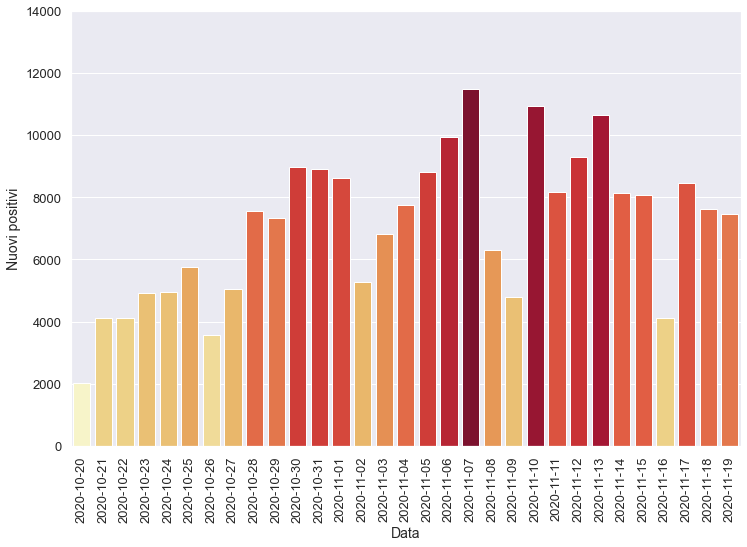

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

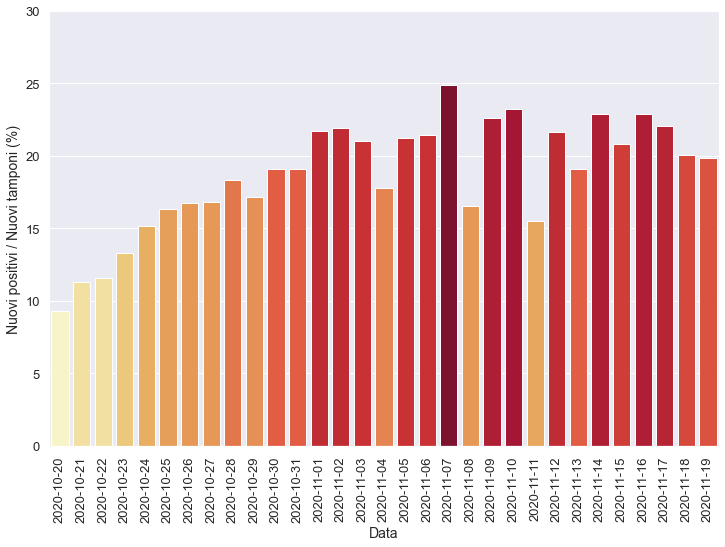

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

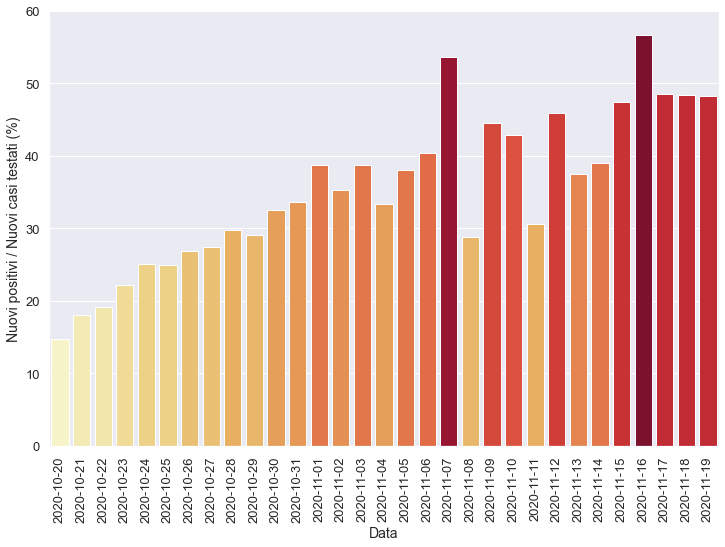

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

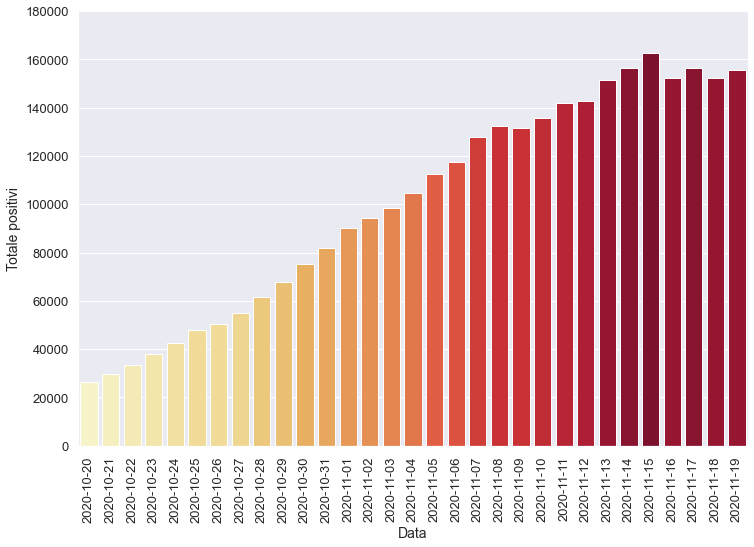

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

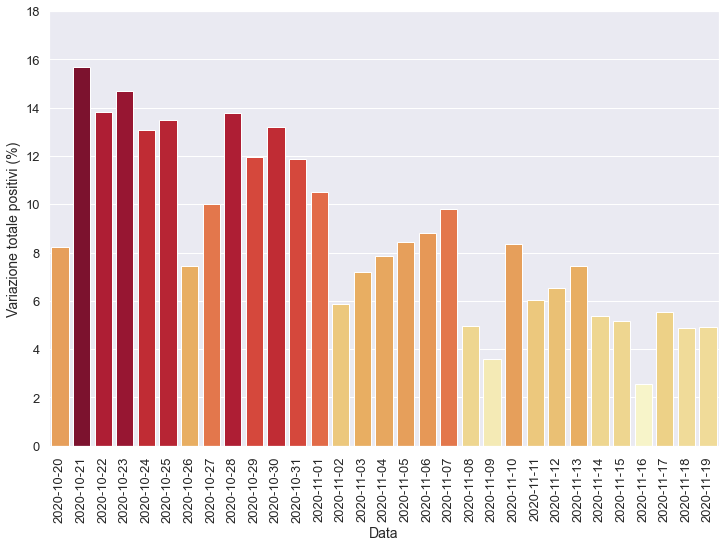

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

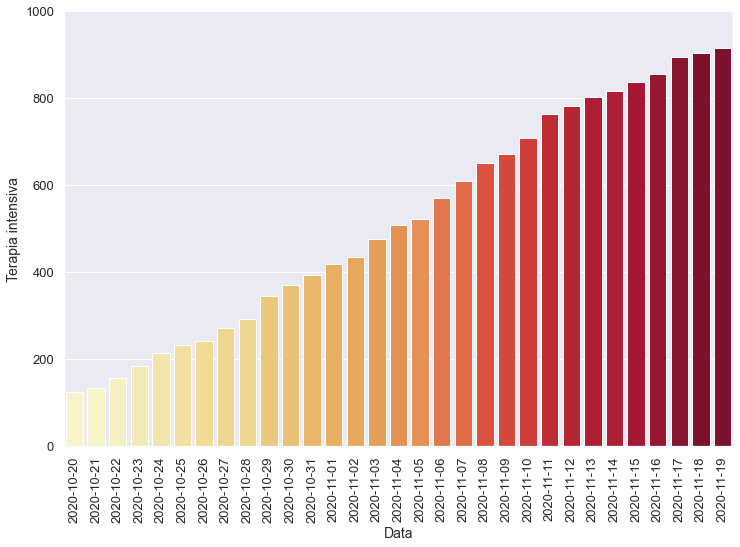

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

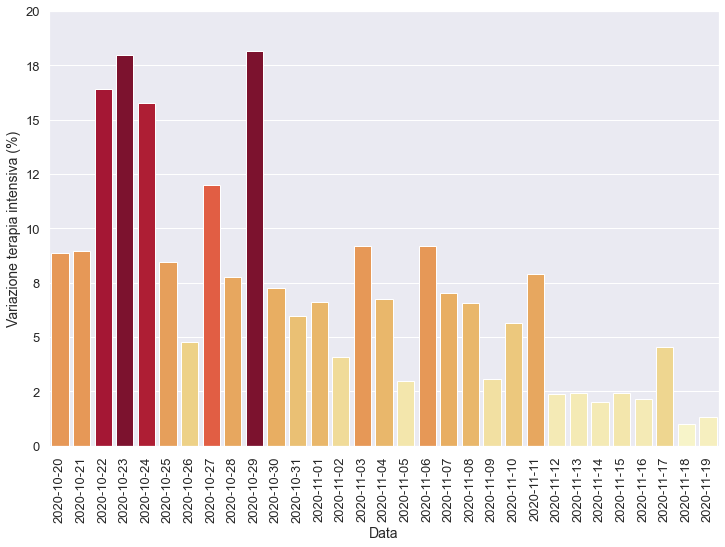

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

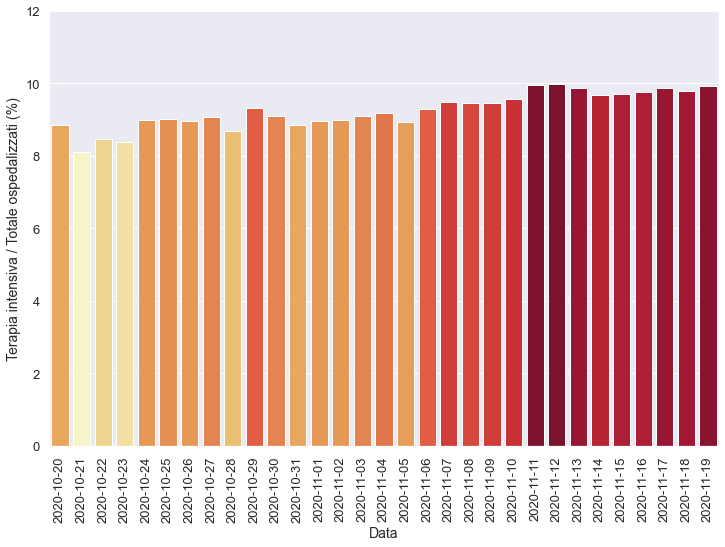

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

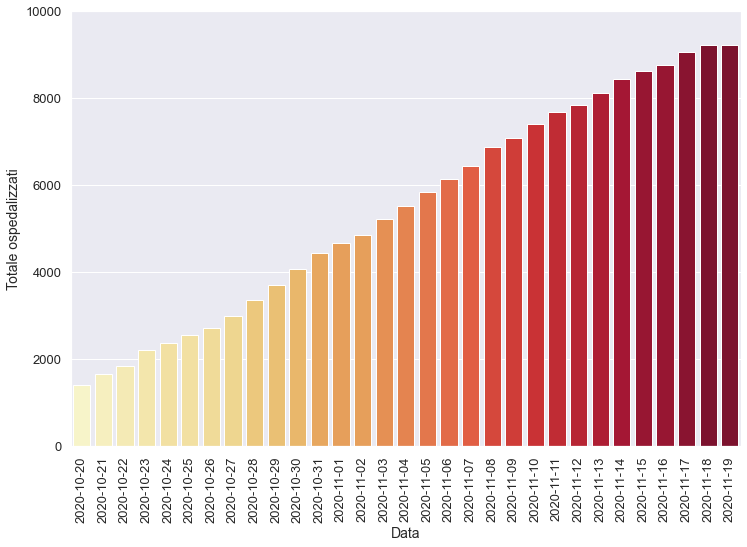

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

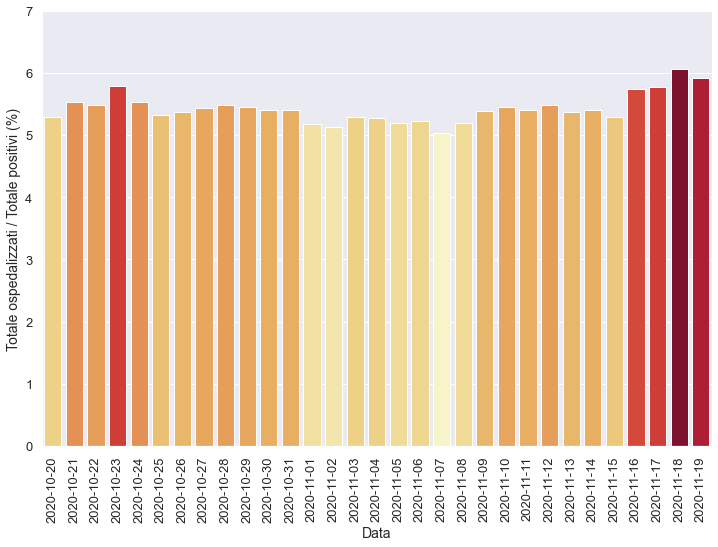

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

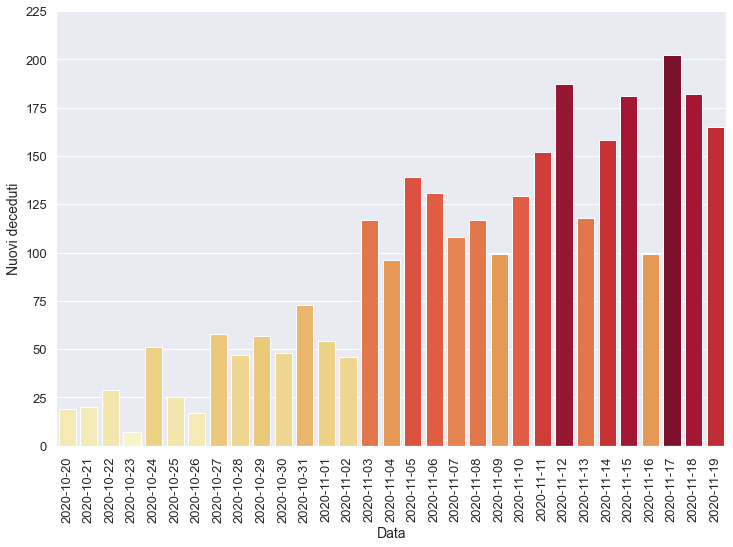

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

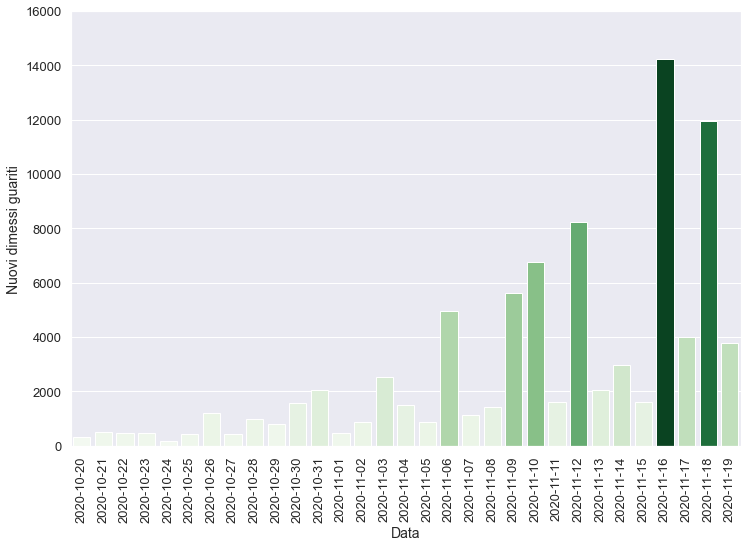

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-12T17:00:00,3,Lombardia,7047,782,7829,134964,142793,875,9291,...,187.0,42933.0,20250.0,717.0,9.99,5.48,21.64,45.88,2.36,6.547
1,2020-11-13T17:00:00,3,Lombardia,7319,801,8120,143149,151269,8476,10634,...,118.0,55636.0,28381.0,8185.0,9.86,5.37,19.11,37.47,2.43,7.447
2,2020-11-14T17:00:00,3,Lombardia,7621,817,8438,147841,156279,5010,8129,...,158.0,35550.0,20854.0,4692.0,9.68,5.40,22.87,38.98,2.00,5.374
3,2020-11-15T17:00:00,3,Lombardia,7781,837,8618,153923,162541,6262,8060,...,181.0,38702.0,16990.0,6082.0,9.71,5.30,20.83,47.44,2.45,5.157
4,2020-11-16T17:00:00,3,Lombardia,7901,855,8756,143583,152339,-10202,4128,...,99.0,18037.0,7285.0,-10340.0,9.76,5.75,22.89,56.66,2.15,2.540
5,2020-11-17T17:00:00,3,Lombardia,8151,894,9045,147522,156567,4228,8448,...,202.0,38283.0,17384.0,3939.0,9.88,5.78,22.07,48.60,4.56,5.546
6,2020-11-18T17:00:00,3,Lombardia,8323,903,9226,142857,152083,-4484,7633,...,182.0,38100.0,15780.0,-4665.0,9.79,6.07,20.03,48.37,1.01,4.875
7,2020-11-19T17:00:00,3,Lombardia,8291,915,9206,146374,155580,3497,7453,...,165.0,37595.0,15423.0,3517.0,9.94,5.92,19.82,48.32,1.33,4.901


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

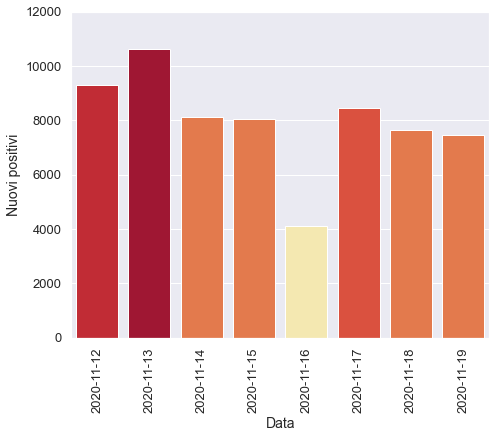

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

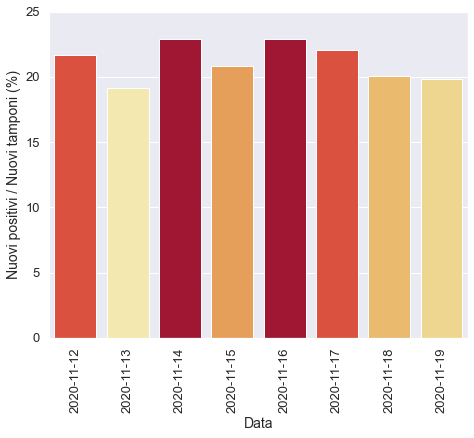

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

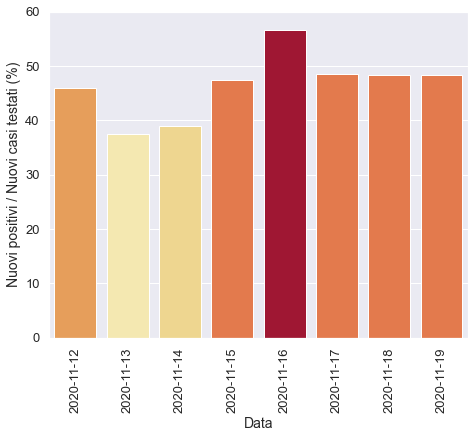

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

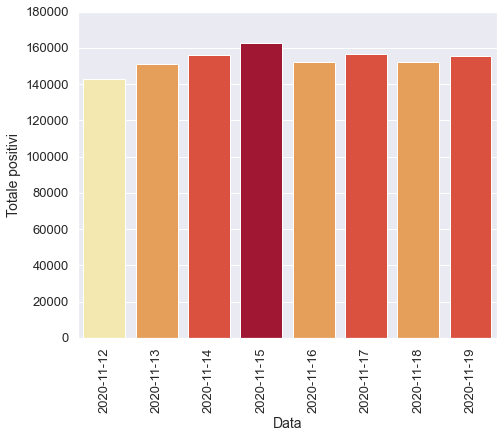

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

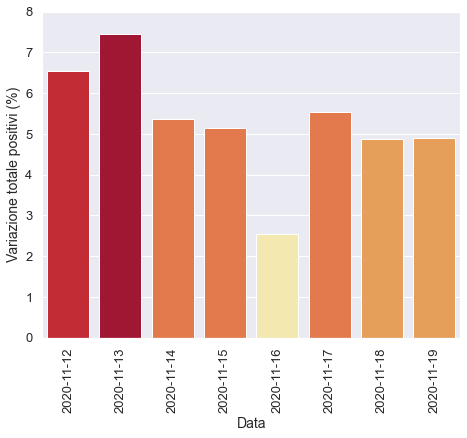

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

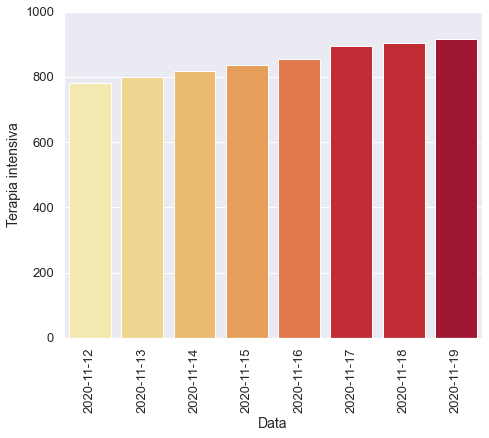

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

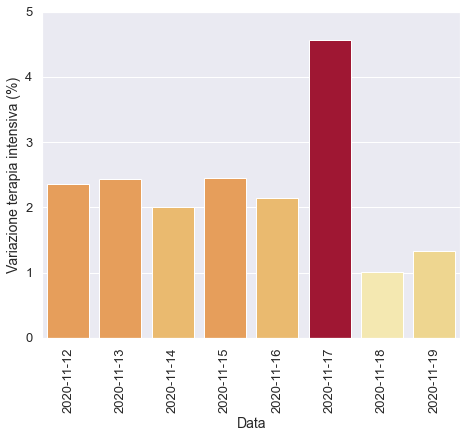

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

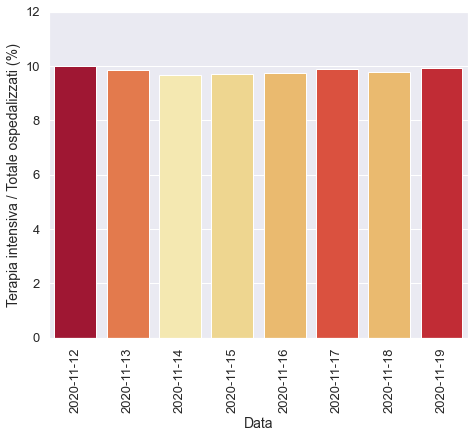

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

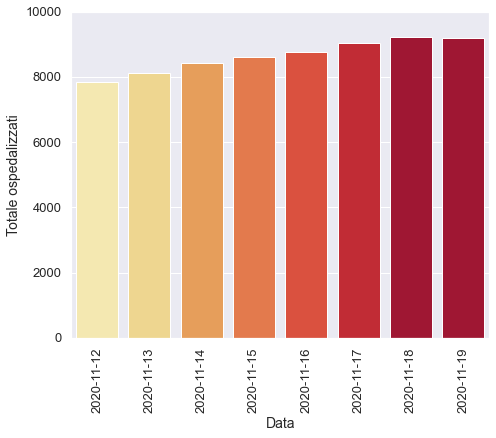

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

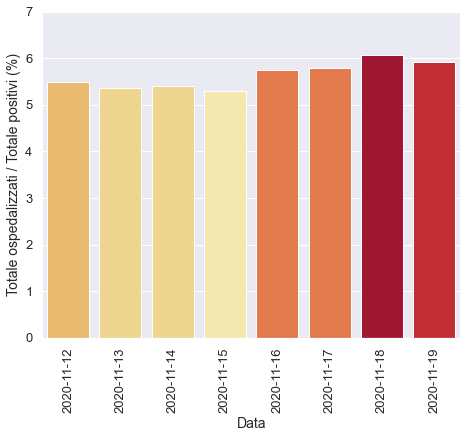

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

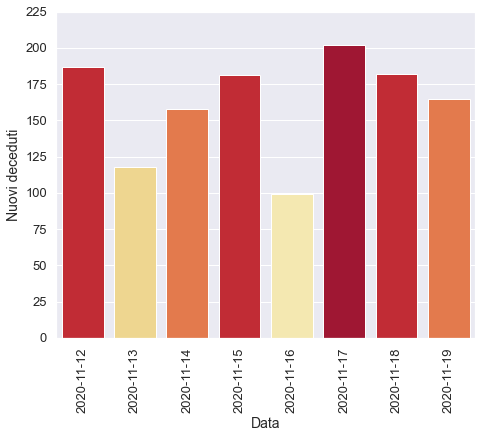

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

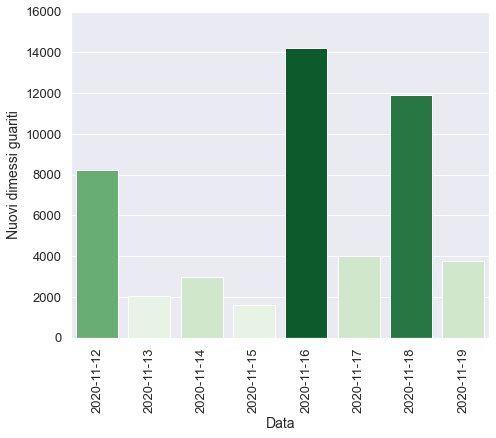

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)